In [25]:
import plotly.graph_objects as go
from itertools import product
import networkx as nx
from matplotlib import pyplot as plt

# G = nx.random_geometric_graph(200, 0.125)

In [26]:
import yaml
with open('website_by_type.yaml', 'r') as stream:
    website_by_type = yaml.safe_load(stream)

import pickle
with open('web2tracker.pkl', 'rb') as handle:
    web2tracker = pickle.load(handle)
print(web2tracker)

defaultdict(<class 'set'>, {'Google.com': {'adservice.google.com/'}, 'Youtube.com': {'googleads.g.doubleclick.net/', 'static.doubleclick.net/'}, 'Amazon.com': {'s.amazon-adsystem.com/', 'facebook.com/', 'm.media-amazon.com/', 'assoc-na.associates-amazon.com/', 'analytics.twitter.com/', 'c.amazon-adsystem.com/', 'aax-us-east.amazon-adsystem.com/', 'images-na.ssl-images-amazon.com/', 'us-u.openx.net/'}, 'Facebook.com': {'googleads.g.doubleclick.net/', 'google.com/', 'cx.atdmt.com/'}, 'Yahoo.com': {'googleads.g.doubleclick.net/', 'facebook.com/', 'secure.adnxs.com/', 'ads.pubmatic.com/', 'cm.g.doubleclick.net/', 'opus.analytics.yahoo.com/', 'adservice.google.com/', 'token.rubiconproject.com/', 'pixel.advertising.com/', 'tag.sp.advertising.com/', 'bid.g.doubleclick.net/', 'video.adaptv.advertising.com/', 's.yimg.com/', 'ssum.sec.casalemedia.com/', 'ssum-sec.casalemedia.com/', 'ads.yahoo.com/', 'pixel.rubiconproject.com/', 'sb.scorecardresearch.com/', 'us-west-1.onemobile.yahoo.com/', 'imag

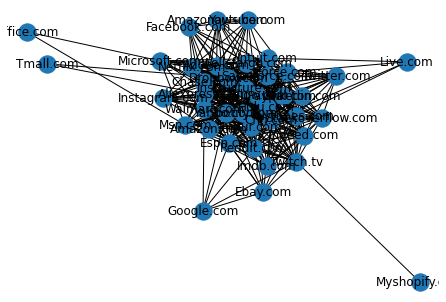

In [38]:
website_white_list = set(website_by_type["Social Media"])

G = nx.Graph()
for x,y in product(web2tracker.keys(), web2tracker.keys()):
    if x != y:
        if len(website_white_list) != 0 and (x not in website_white_list or y not in website_white_list):
            continue
        common_tracker = web2tracker[x].intersection(web2tracker[y])
        if len(common_tracker) > 0:
            G.add_node(x)
            G.add_node(y)
            G.add_edge(x, y)
            # print(x, y, common_tracker)
nx.draw(G, with_labels=True)
# plt.show()
plt.savefig("preliminary_figure.png")

In [36]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

KeyError: 'pos'

In [4]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [5]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()